In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report



In [2]:
# Load the dataset
data = pd.read_csv("creditcard.csv")

In [3]:
data.shape

(284807, 31)

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.columns.to_list()

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [6]:
data[['Amount','Time','Class']].head(5)

,Amount,Time,Class
0,149.62,0.0,0
1,2.69,0.0,0
2,378.66,1.0,0
3,123.50,1.0,0
4,69.99,2.0,0


In [7]:
# Data preprocessing
# Standardize the 'Amount' column
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

In [8]:
data[['Amount','Time','Class']].head(5)

,Amount,Time,Class
0,0.244964,0.0,0
1,-0.342475,0.0,0
2,1.160686,1.0,0
3,0.140534,1.0,0
4,-0.073403,2.0,0


In [9]:
# Split the data into features and labels
X = data.drop(['Time', 'Class'], axis=1)
y = data['Class']

In [10]:
X.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [11]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [12]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (227845, 29)
Number transactions y_train dataset:  (227845,)
Number transactions X_test dataset:  (56962, 29)
Number transactions y_test dataset:  (56962,)


SMOTE (Synthetic Minority Oversampling Technique) – Oversampling:
SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them. SMOTE synthesises new minority instances between existing minority instances. It generates the virtual training records by linear interpolation for the minority class. These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class. After the oversampling process, the data is reconstructed and several classification models can be applied for the processed data.

In [15]:
print('Before OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape))
  
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

Before OverSampling, the shape of train_X: (227845, 29)
Before OverSampling, the shape of train_y: (227845,) 

Before OverSampling, counts of label '1': 394
Before OverSampling, counts of label '0': 227451 



In [16]:
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [17]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))


After OverSampling, the shape of train_X: (454902, 29)
After OverSampling, the shape of train_y: (454902,) 

After OverSampling, counts of label '1': 227451
After OverSampling, counts of label '0': 227451


In [18]:
data = data.drop(['Time'], axis=1)

In [19]:
data.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [20]:
# Initialize PyCaret setup
from pycaret.classification import *
exp1 = setup(data, target='Class', fix_imbalance=True, imputation_type='iterative', session_id=123,)

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Binary
3,Original data shape,"(284807, 30)"
4,Transformed data shape,"(483483, 30)"
5,Transformed train set shape,"(398040, 30)"
6,Transformed test set shape,"(85443, 30)"
7,Numeric features,29
8,Preprocess,True
9,Imputation type,iterative


In [21]:
# Compare models and select the best
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9995,0.9780,0.8315,0.8673,0.8480,0.8477,0.8484,43.3440
et,Extra Trees Classifier,0.9995,0.9720,0.8229,0.8881,0.8538,0.8536,0.8544,12.6890
lightgbm,Light Gradient Boosting Machine,0.9988,0.9710,0.8579,0.6208,0.7170,0.7165,0.7275,4.3410
knn,K Neighbors Classifier,0.9984,0.9372,0.8578,0.5185,0.6454,0.6446,0.6657,14.0180
dummy,Dummy Classifier,0.9983,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3520
dt,Decision Tree Classifier,0.9978,0.8942,0.7903,0.4238,0.5500,0.5490,0.5768,4.7510
gbc,Gradient Boosting Classifier,0.9906,0.9789,0.8985,0.1457,0.2502,0.2479,0.3589,98.5660
ridge,Ridge Classifier,0.9878,0.0000,0.8318,0.1077,0.1906,0.1882,0.2966,0.3720
lda,Linear Discriminant Analysis,0.9878,0.9697,0.8318,0.1077,0.1906,0.1882,0.2966,1.8170
ada,Ada Boost Classifier,0.9822,0.9796,0.8896,0.0811,0.1484,0.1457,0.2651,19.0950


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [22]:
best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

In [23]:
ET = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9993,0.9483,0.8000,0.8000,0.8000,0.7996,0.7996
1,0.9995,0.9484,0.8000,0.9032,0.8485,0.8482,0.8498
2,0.9994,0.9975,0.7714,0.8710,0.8182,0.8179,0.8194
3,0.9995,0.9826,0.8571,0.8571,0.8571,0.8569,0.8569
4,0.9997,0.9491,0.8824,0.9375,0.9091,0.9089,0.9094
5,0.9993,0.9811,0.7353,0.8333,0.7812,0.7809,0.7824
6,0.9996,0.9663,0.8529,0.9355,0.8923,0.8921,0.8931
7,0.9995,0.9496,0.8235,0.8750,0.8485,0.8482,0.8486
8,0.9995,0.9972,0.7941,0.9000,0.8438,0.8435,0.8452


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [24]:
# Tune the best model
tuned_model, tuner = tune_model(ET, return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9990,0.9797,0.7714,0.6923,0.7297,0.7292,0.7303
1,0.9992,0.9499,0.7714,0.7714,0.7714,0.7710,0.7710
2,0.9992,0.9859,0.8286,0.7436,0.7838,0.7834,0.7845
3,0.9993,0.9748,0.9143,0.7442,0.8205,0.8202,0.8245
4,0.9993,0.9670,0.8529,0.7838,0.8169,0.8166,0.8173
5,0.9991,0.9849,0.7941,0.7297,0.7606,0.7601,0.7608
6,0.9990,0.9902,0.8529,0.6744,0.7532,0.7528,0.7580
7,0.9992,0.9647,0.8824,0.7143,0.7895,0.7891,0.7935
8,0.9993,0.9885,0.8824,0.7692,0.8219,0.8216,0.8235


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [25]:
type(tuned_model), type(tuner)

(sklearn.ensemble._forest.ExtraTreesClassifier,
 sklearn.model_selection._search.RandomizedSearchCV)

In [26]:
print(tuner)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('iterative_imputer',
                                              TransformerWrapper(exclude=None,
                                                                 include=None,
                                                                 transformer=IterativeImputer(add_indicator=False,
                                                                                              cat_estimator=LGBMClassifier(boosting_type='gbdt',
                                                                                                                           class_weight=None,
                                                                                                                           colsample_byt...
                                        'ac

In [33]:
# Make predictions on the test set
y_pred = predict_model(tuned_model, data=X_test)

In [35]:
y_pred

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,prediction_label,prediction_score
43428,-16.526506,8.584971,-18.649853,9.505593,-13.793818,-2.832404,-16.701694,7.517344,-8.507059,-14.110185,...,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,1.102834,1,1.00
49906,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,-0.565012,...,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,1.726255,0,1.00
29474,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,0.756801,...,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,-0.229289,0,1.00
276481,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,...,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,-0.347232,0,1.00
278846,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,0.259452,...,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,-0.349671,0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75723,-1.994348,1.503076,-0.365560,0.780223,-0.957956,0.038648,-0.453702,1.553565,-0.561964,-0.100318,...,0.319275,-0.081356,-0.366704,-0.269380,-0.278170,0.082042,-0.015071,-0.050614,0,1.00
252263,-0.234567,0.733694,0.486250,-0.718186,0.782227,-0.788837,1.056307,-0.175016,-0.244864,-0.708527,...,-0.574857,-0.024845,-0.428558,-0.563551,0.159926,0.094924,0.163736,-0.313289,0,1.00
221246,0.040441,-0.109737,-1.266430,1.004783,2.223390,-0.670372,0.490662,-0.033739,-0.307052,0.402303,...,0.930041,0.162391,-1.180279,-1.484172,-0.619133,0.357845,0.354379,-0.322724,0,1.00
81910,-0.495048,0.991481,1.671584,-0.342474,0.470012,-0.348503,0.996077,-0.351891,-0.219231,0.579396,...,-0.474178,-0.145562,-0.011279,-0.162997,0.020511,0.040529,-0.269775,-0.338876,0,1.00


In [37]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred['prediction_label'])
accuracy = accuracy_score(y_test, y_pred['prediction_label'])
class_report = classification_report(y_test, y_pred['prediction_label'])

In [43]:
from sklearn.metrics import classification_report

# Assuming you have ground truth labels (y_true) and predicted labels (y_pred)
# y_true is your true class labels
# y_pred is the predicted class labels from your model

# Calculate classification metrics
report = classification_report(y_test, y_pred['prediction_label'])

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.98      0.92      0.95        98

    accuracy                           1.00     56962
   macro avg       0.99      0.96      0.97     56962
weighted avg       1.00      1.00      1.00     56962



In [38]:
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[56862     2]
 [    8    90]]
Accuracy: 0.9998244443664197
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.98      0.92      0.95        98

    accuracy                           1.00     56962
   macro avg       0.99      0.96      0.97     56962
weighted avg       1.00      1.00      1.00     56962



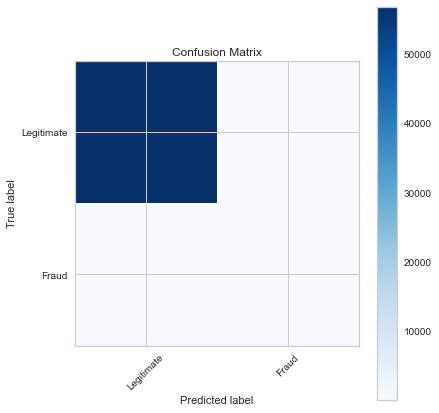

In [39]:
# Visualize the confusion matrix
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title('Confusion Matrix')
    plt.colorbar()

    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

labels = ['Legitimate', 'Fraud']
plot_confusion_matrix(conf_matrix, labels)
plt.show()